# RE

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [33]:
ds_vivi = pd.read_csv('datos/conjunto_de_datos_viviendas_enigh_2016_ns.csv')
ds_vivi

,folioviv,tipo_viv,mat_pared,mat_techos,mat_pisos,antiguedad,antigua_ne,cocina,cocina_dor,cuart_dorm,...,tot_hom,tot_muj,tot_hog,ubica_geo,ageb,tam_loc,est_socio,est_dis,upm,factor
0,100298502,1,8,10,3,40,NaN,1,2.0,5,...,2,2,1,10010000,000-0,1,4,3,320,212
1,100298504,1,8,10,3,9,NaN,1,2.0,3,...,1,2,1,10010000,000-0,1,4,3,320,212
2,100298506,1,8,10,3,5,NaN,1,2.0,4,...,2,1,1,10010000,000-0,1,4,3,320,212
3,100318603,1,8,10,3,25,NaN,1,2.0,5,...,3,3,2,10010000,000-0,1,4,3,330,237
4,100318605,1,8,10,3,35,NaN,1,2.0,3,...,2,2,1,10010000,000-0,1,4,3,330,237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69164,3260583804,1,7,10,2,30,NaN,1,2.0,3,...,2,1,1,320420000,000-0,4,2,536,78870,194
69165,3260583805,1,1,3,2,11,NaN,1,2.0,3,...,3,2,1,320420000,000-0,4,2,536,78870,194
69166,3260583806,1,7,3,2,41,NaN,1,2.0,2,...,1,6,1,320420000,000-0,4,2,536,78870,194
69167,3260583907,1,7,3,2,20,NaN,1,2.0,2,...,2,3,1,320420000,000-0,4,2,536,78870,194


In [34]:
vivi = ds_vivi[['folioviv', 'pago_mesp']]
vivi

,folioviv,pago_mesp
0,100298502,NaN
1,100298504,NaN
2,100298506,NaN
3,100318603,NaN
4,100318605,1.0
...,...,...
69164,3260583804,NaN
69165,3260583805,NaN
69166,3260583806,NaN
69167,3260583907,NaN


In [35]:
vivi['pago_mesp'] = vivi['pago_mesp'].replace(1, 0)
vivi['pago_mesp'] = vivi['pago_mesp'].replace(2, 1)
vivi['pago_mesp'].fillna(0, inplace=True)

In [36]:
vivi['pago_mesp']= vivi['pago_mesp'].astype('int64')

In [37]:
vivi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69169 entries, 0 to 69168
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   folioviv   69169 non-null  int64
 1   pago_mesp  69169 non-null  int64
dtypes: int64(2)
memory usage: 1.1 MB


In [38]:
vivi.isnull().sum()

folioviv     0
pago_mesp    0
dtype: int64

In [39]:
crr = ds_vivi.corr()['pago_mesp']
print(crr)

folioviv     -0.002957
mat_pared    -0.050816
mat_techos   -0.046229
antiguedad    0.028123
antigua_ne         NaN
cocina        0.028010
cocina_dor   -0.012068
cuart_dorm   -0.019896
num_cuarto   -0.036655
disp_agua     0.059104
dotac_agua    0.011245
excusado      0.020859
uso_compar   -0.003581
sanit_agua    0.068298
biodigest     0.006042
bano_comp    -0.047374
bano_excus    0.015243
bano_regad   -0.010865
drenaje       0.065785
disp_elect    0.030220
focos_inca   -0.005604
focos_ahor   -0.043592
combustibl   -0.028831
estufa_chi   -0.030884
eli_basura    0.018394
tenencia      0.120264
renta        -0.091935
estim_pago    0.035726
pago_viv      0.038927
pago_mesp     1.000000
tipo_adqui    0.127787
viv_usada    -0.003213
num_dueno1    0.025677
hog_dueno1   -0.004134
num_dueno2    0.012166
hog_dueno2         NaN
escrituras    0.098694
lavadero      0.035346
fregadero     0.046447
regadera      0.058404
tinaco_azo    0.036051
cisterna      0.055180
pileta       -0.005370
calent_sol 

In [40]:
ds_gasto = pd.read_csv('datos/conjunto_de_datos_gastoshogar_enigh_2016_ns.csv')
ds_gasto

,folioviv,foliohog,clave,tipo_gasto,mes_dia,forma_pag1,forma_pag2,forma_pag3,lugar_comp,orga_inst,...,inmujer,inst_1,inst_2,num_meses,num_pagos,ultim_pago,gasto_tri,gasto_nm,gas_nm_tri,imujer_tri
0,100031904,1,H102,G1,0,1,0,0,5,0,...,500.0,NaN,NaN,NaN,NaN,NaN,489.13,NaN,NaN,489.13
1,100031904,1,H110,G1,0,1,0,0,7,0,...,NaN,NaN,NaN,NaN,NaN,NaN,684.78,NaN,NaN,NaN
2,100031904,1,J044,G1,0,1,0,0,5,0,...,-1.0,1.0,NaN,NaN,NaN,NaN,97.82,NaN,NaN,-1.00
3,100031905,1,C001,G1,0,6,0,0,9,0,...,NaN,NaN,NaN,NaN,NaN,NaN,609.67,NaN,NaN,NaN
4,100031905,1,C004,G1,0,6,0,0,9,0,...,NaN,NaN,NaN,NaN,NaN,NaN,348.38,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1960390521,1,I026,G1,0,1,0,0,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,24.45,NaN,NaN,NaN
1048571,1960390521,1,N014,G1,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,39.13,NaN,NaN,NaN
1048572,1960390523,1,C001,G1,0,1,0,0,6,0,...,NaN,NaN,NaN,NaN,NaN,NaN,87.09,NaN,NaN,NaN
1048573,1960390523,1,C003,G1,0,1,0,0,6,0,...,NaN,NaN,NaN,NaN,NaN,NaN,63.87,NaN,NaN,NaN


In [41]:
gasto = ds_gasto[['folioviv','gasto_tri']]
gasto

,folioviv,gasto_tri
0,100031904,489.13
1,100031904,684.78
2,100031904,97.82
3,100031905,609.67
4,100031905,348.38
...,...,...
1048570,1960390521,24.45
1048571,1960390521,39.13
1048572,1960390523,87.09
1048573,1960390523,63.87


In [42]:
gasto.isnull().sum()

folioviv     0
gasto_tri    8
dtype: int64

In [43]:
gasto['gasto_tri'].fillna(0, inplace=True)

In [44]:
gasto.isnull().sum()



folioviv     0
gasto_tri    0
dtype: int64

In [45]:
ds_ingre = pd.read_csv('datos/conjunto_de_datos_ingresos_enigh_2016_ns.csv')
ds_ingre

,folioviv,foliohog,numren,clave,mes_1,mes_2,mes_3,mes_4,mes_5,mes_6,ing_1,ing_2,ing_3,ing_4,ing_5,ing_6,ing_tri
0,100252301,1,2,P009,NaN,NaN,NaN,NaN,NaN,NaN,20000,0,0,0,0,0,4891.30
1,100252301,1,2,P044,8.0,7.0,6.0,5.0,4.0,3.0,1200,0,1200,0,1200,0,1760.86
2,100252301,1,2,P051,8.0,7.0,6.0,5.0,4.0,3.0,10000,0,0,0,0,0,4891.30
3,100252301,2,1,P001,8.0,7.0,6.0,5.0,4.0,3.0,8000,8000,8000,8000,8000,8000,23478.26
4,100252301,1,1,P044,8.0,7.0,6.0,5.0,4.0,3.0,1100,0,1100,0,1100,0,1614.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334332,3260578405,1,3,P044,8.0,7.0,6.0,5.0,4.0,3.0,0,1160,0,1160,0,1160,1702.17
334333,3260578405,1,1,P043,8.0,7.0,6.0,5.0,4.0,3.0,0,0,0,3900,0,0,1907.60
334334,3260578405,1,3,P042,8.0,7.0,6.0,5.0,4.0,3.0,0,900,0,900,0,900,1320.65
334335,3260578405,1,1,P044,8.0,7.0,6.0,5.0,4.0,3.0,0,1160,0,1160,0,1160,1702.17


In [46]:
ingre = ds_ingre[['folioviv','ing_tri']]


In [47]:
ingre.isnull().sum()

folioviv    0
ing_tri     0
dtype: int64

In [48]:
momento = pd.merge(left=gasto, right=ingre,left_on='folioviv',right_on='folioviv',how='inner')
momento

,folioviv,gasto_tri,ing_tri
0,100031904,489.13,611.41
1,100031904,489.13,7043.47
2,100031904,489.13,14673.91
3,100031904,489.13,146.73
4,100031904,684.78,611.41
...,...,...,...
5647240,1960390523,63.87,5654.34
5647241,1960390523,98.70,274.40
5647242,1960390523,98.70,16679.34
5647243,1960390523,98.70,317.93


In [49]:
g= momento.groupby(['folioviv'])['gasto_tri', 'ing_tri'].sum()
g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43083 entries, 100003801 to 1960457025
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gasto_tri  43083 non-null  float64
 1   ing_tri    43083 non-null  float64
dtypes: float64(2)
memory usage: 1009.8 KB


In [50]:
DS_Bonito = pd.merge(left=g, right=vivi,left_on='folioviv',right_on='folioviv',how='inner')
DS_Bonito

,folioviv,gasto_tri,ing_tri,pago_mesp
0,100003801,102287.72,3524384.50,0
1,100003802,323817.18,5394097.44,0
2,100003803,30520.57,2726557.35,0
3,100003804,67201.85,1398687.60,0
4,100003805,47740.52,1480327.45,0
...,...,...,...,...
43078,1960457021,26569.11,240358.59,0
43079,1960457022,284.49,18489.12,0
43080,1960457023,456710.40,2280324.48,0
43081,1960457024,7358.88,247108.44,0


In [51]:
DS_Bonito.describe()

,folioviv,gasto_tri,ing_tri,pago_mesp
count,4.308300e+04,4.308300e+04,4.308300e+04,43083.000000
mean,9.836190e+08,6.281129e+04,1.135991e+06,0.016108
std,5.626810e+08,1.241755e+05,8.099724e+06,0.125894
min,1.000038e+08,1.467000e+01,7.377000e+01,0.000000
25%,5.029416e+08,1.078942e+04,2.646588e+05,0.000000
50%,9.154223e+08,2.789244e+04,5.914950e+05,0.000000
75%,1.506556e+09,6.686314e+04,1.236785e+06,0.000000
max,1.960457e+09,4.506876e+06,1.538014e+09,1.000000


In [52]:
crr = DS_Bonito.corr()
print(crr)

           folioviv  gasto_tri   ing_tri  pago_mesp
folioviv   1.000000  -0.037098 -0.003556  -0.032170
gasto_tri -0.037098   1.000000  0.299470  -0.006236
ing_tri   -0.003556   0.299470  1.000000  -0.002972
pago_mesp -0.032170  -0.006236 -0.002972   1.000000


In [53]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = DS_Bonito.drop(['folioviv','pago_mesp'], axis=1)
X#en 60 hay un 2

,gasto_tri,ing_tri
0,102287.72,3524384.50
1,323817.18,5394097.44
2,30520.57,2726557.35
3,67201.85,1398687.60
4,47740.52,1480327.45
...,...,...
43078,26569.11,240358.59
43079,284.49,18489.12
43080,456710.40,2280324.48
43081,7358.88,247108.44


In [54]:
# Putting response variable to y
y = DS_Bonito['pago_mesp']

y.head()

0    0
1    0
2    0
3    0
4    0
Name: pago_mesp, dtype: int64

In [55]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [56]:
#feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['gasto_tri','ing_tri']] = scaler.fit_transform(X_train[['gasto_tri','ing_tri']])

X_train.head()

,gasto_tri,ing_tri
27352,-0.430399,-0.273713
4523,-0.270872,-0.201380
10580,0.264707,-0.096918
31273,-0.273705,-0.120688
10702,-0.166144,-0.029374


In [57]:
import statsmodels.api as sm

# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              pago_mesp   No. Observations:                30158
Model:                            GLM   Df Residuals:                    30155
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2502.3
Date:                Thu, 05 Mar 2020   Deviance:                       5004.6
Time:                        20:40:54   Pearson chi2:                 3.01e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.1119      0.046    -89.260      0.000      -4.202      -4.022
gasto_tri      0.0647      0.064      1.006      0.315      -0.061       0.191
ing_tri       -0.3441      0.181     -1.897      0.058      -0.700       0.011
==============================================================================
"""

In [58]:
#Feature Selection Using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [59]:
rfe.support_

array([ True,  True])

In [60]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('gasto_tri', True, 1), ('ing_tri', True, 1)]

In [61]:
col = X_train.columns[rfe.support_]
col

Index(['gasto_tri', 'ing_tri'], dtype='object')

In [62]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

In [63]:
#Assessing the model with StatsModels
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              pago_mesp   No. Observations:                30158
Model:                            GLM   Df Residuals:                    30155
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2502.3
Date:                Thu, 05 Mar 2020   Deviance:                       5004.6
Time:                        20:40:55   Pearson chi2:                 3.01e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.1119      0.046    -89.260      0.000      -4.202      -4.022
gasto_tri      0.0647      0.064      1.006      0.315      -0.061       0.191
ing_tri       -0.3441      0.181     -1.897      0.058      -0.700       0.011
==============================================================================
"""

In [64]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

27352    0.017199
4523     0.016954
10580    0.016933
31273    0.016495
10702    0.016103
32942    0.016367
18316    0.016346
41245    0.016592
26254    0.016784
39215    0.014998
dtype: float64

In [65]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.01719881, 0.01695432, 0.01693287, 0.01649471, 0.01610255,
       0.01636673, 0.01634581, 0.01659213, 0.01678366, 0.01499796])

In [66]:
#Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.017199,27352
1,0,0.016954,4523
2,0,0.016933,10580
3,0,0.016495,31273
4,0,0.016103,10702


In [67]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.017199,27352,0
1,0,0.016954,4523,0
2,0,0.016933,10580,0
3,0,0.016495,31273,0
4,0,0.016103,10702,0


In [68]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  

[[29668     0]
 [  490     0]]


In [69]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.983752238212083


In [70]:
#Checking VIFs
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,gasto_tri,1.15
1,ing_tri,1.15


### Metrics beyond simply accuracy

In [71]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [72]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.0

In [73]:
# Let us calculate specificity
TN / float(TN+FP)

1.0

In [74]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.0


In [75]:
# positive predictive value 
print (TP / float(TP+FP))

nan


In [76]:
# Negative predictive value
print (TN / float(TN+ FN))

0.983752238212083


In [77]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [78]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )


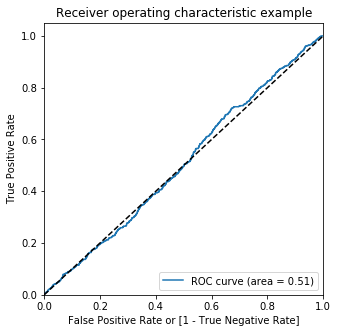

In [79]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [80]:
#me falto el paso 10
